In [1]:
!pip install tensorflow

In [2]:
# Importing standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Optional: prevent TensorFlow from using GPU (for debugging or testing)
# tf.config.set_visible_devices([], 'GPU')

# Check how many GPUs are available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
import pandas as pd
import zipfile
from google.colab import drive

drive.mount('/content/drive')  # מחבר את הדרייב, יווצר קישור לנתיב /content/drive

Mounted at /content/drive


In [4]:
pwd

'/content'

In [5]:
import zipfile

zip_file = '/content/drive/MyDrive/content/Face_Mask_Dataset.zip'  # הנתיב לקובץ הדחוס בדרייב

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
  zip_ref.extractall('/content/dataset')  # חילוץ הקבצים לתיקייה חדשה

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Normalize pixel values to [0,1] — helps speed up training and stabilize gradients
    shear_range=0.2,        # Apply a slight diagonal transformation (shear) — simulates natural changes in camera angle
    zoom_range=0.2,         # Apply random zoom-in effect — helps the model recognize objects at different scales
    horizontal_flip=True    # Flip images horizontally — helps the model handle symmetry (e.g., cat facing left or right)
)

# Testing data generator — only normalization, no augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
training_set = train_datagen.flow_from_directory(
    '/content/dataset/data',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

# הדאטאסט לא הגיע עם תיקיית טסט, וזה מסובך לי מדי כרגע לעשות טריין-טסט-ספליט...
# test_set = test_datagen.flow_from_directory(
#     '/content/dataset/test',
#     target_size=(64, 64),
#     batch_size=32,
#     class_mode='binary'
# )

Found 7553 images belonging to 2 classes.


In [8]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

cnn = Sequential()

# שכבת קלט
cnn.add(Input(shape=[64, 64, 3]))

# שכבת קונבולוציה ראשונה
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2, strides=2))

# שכבת קונבולוציה שנייה
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2, strides=2))

# Flatten
cnn.add(Flatten())

# Fully Connected
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=1, activation='sigmoid'))  # בגלל שזה סיווג בינארי

In [10]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn.fit(
    x=training_set,
    # validation_data=test_set,
    epochs=6
    )  # זה צריך להיות 25, פשוט המעבד התרסט לי תוך כדי התרגול וכל פעם אני צריך להריץ מהתחלה, אז בחרתי סכום קטן


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/6
134/237 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.6958 - loss: 0.5818

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


237/237 ━━━━━━━━━━━━━━━━━━━━ 28s 98ms/step - accuracy: 0.7525 - loss: 0.5007
Epoch 2/6
237/237 ━━━━━━━━━━━━━━━━━━━━ 23s 96ms/step - accuracy: 0.9020 - loss: 0.2628
Epoch 3/6
237/237 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step - accuracy: 0.9020 - loss: 0.2463
Epoch 4/6
237/237 ━━━━━━━━━━━━━━━━━━━━ 22s 91ms/step - accuracy: 0.9214 - loss: 0.1941
Epoch 5/6
237/237 ━━━━━━━━━━━━━━━━━━━━ 22s 94ms/step - accuracy: 0.9305 - loss: 0.1758
Epoch 6/6
237/237 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.9375 - loss: 0.1656


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0.3745994]]
Mask Detected


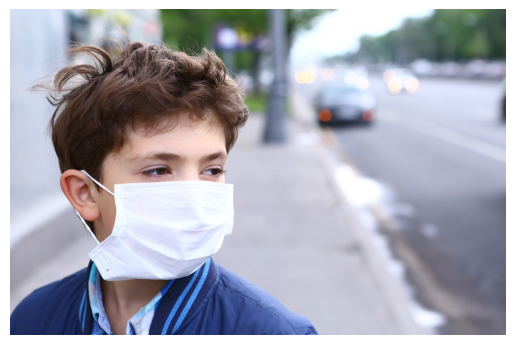

In [21]:
import numpy as np
from keras.preprocessing import image

# טוענים את התמונה
test_image = image.load_img('/content/dataset/test/test_mask.jpg', target_size=(64, 64))

# Convert image to array
test_image = image.img_to_array(test_image)

# Normalize pixel values (rescale to [0,1])
test_image = test_image / 255.0

# Expand dimensions to match the CNN model input shape
test_image = np.expand_dims(test_image, axis=0)

# Predict using the trained CNN model
result = cnn.predict(test_image)
print(result)

# Interpret the result
if result[0][0] > 0.5:
    print("No Mask Detected")
else:
    print("Mask Detected")

import matplotlib.pyplot as plt
path = '/content/dataset/test/test_mask.jpg'  # ודא שסיום הקובץ .jpg/.png
img = image.load_img(path)
plt.imshow(img)
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0.9951514]]
No Mask Detected


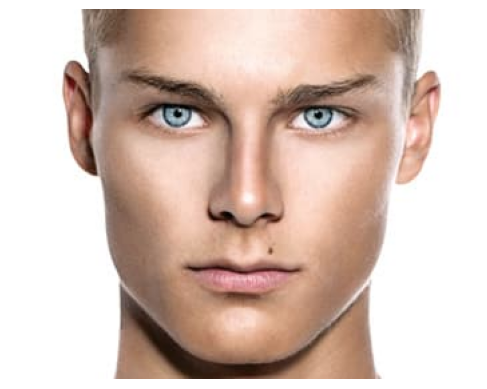

In [22]:
import numpy as np
from keras.preprocessing import image

# טוענים את התמונה
test_image = image.load_img('/content/dataset/test/test_mask2.jpg', target_size=(64, 64))

# Convert image to array
test_image = image.img_to_array(test_image)

# Normalize pixel values (rescale to [0,1])
test_image = test_image / 255.0

# Expand dimensions to match the CNN model input shape
test_image = np.expand_dims(test_image, axis=0)

# Predict using the trained CNN model
result = cnn.predict(test_image)
print(result)

# Interpret the result
if result[0][0] > 0.5:
    print("No Mask Detected")
else:
    print("Mask Detected")

import matplotlib.pyplot as plt
path = '/content/dataset/test/test_mask2.jpg'  # ודא שסיום הקובץ .jpg/.png
img = image.load_img(path)
plt.imshow(img)
plt.axis('off')
plt.show()